## 拉勾网Python职位数据分析

In [1]:
import pandas as pd

In [9]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [3]:
df = pd.read_csv("./lagou_python.txt", sep="\t", encoding="gbk")

In [4]:
df.head(3)

,positionId,positionName,companyId,companyFullName,companyShortName,industryField,financeStage,companySize,salary,workYear,education
0,5920752,python开发工程师,62,北京字节跳动科技有限公司,字节跳动,文娱丨内容,C轮,2000人以上,20k-35k,1-3年,本科
1,6625369,Python开发工程师,85693960,北京艨艟信息技术有限公司,Games Vessel,"游戏,软件开发",不需要融资,50-150人,15k-30k,1-3年,本科
2,7594821,python助教,147,北京拉勾网络技术有限公司,拉勾网,企业服务,D轮及以上,500-2000人,10k-15k,1-3年,本科


### 融资阶段的分布

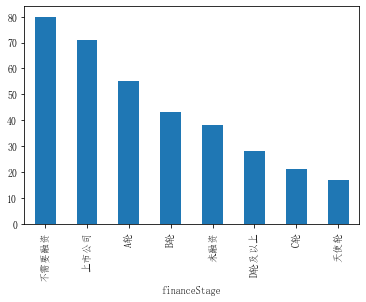

In [13]:
df.groupby("financeStage").size().sort_values(ascending=False).plot.bar()

### 公司规模的分布

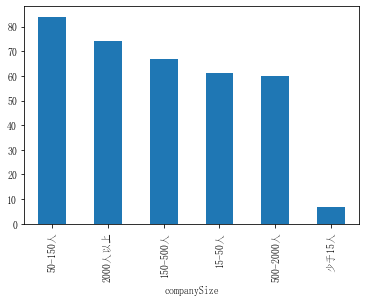

In [14]:
df.groupby("companySize").size().sort_values(ascending=False).plot.bar()

### 薪资分布

In [44]:
# 区间的低薪，每5K进行分区间
df["low_salary"] = df["salary"].map(lambda x : int(x.split("-")[0].replace("k", "")))
df["low_salary"] = pd.cut(df["low_salary"],[5, 10, 15, 20, 25, 30, 35, 40])

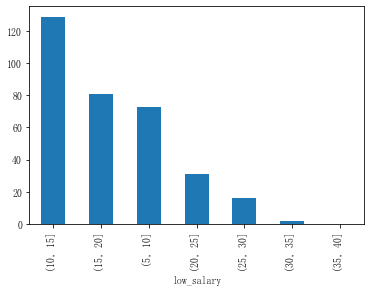

In [45]:
df.groupby("low_salary").size().sort_values(ascending=False).plot.bar()

### 融资阶段与薪资的关系

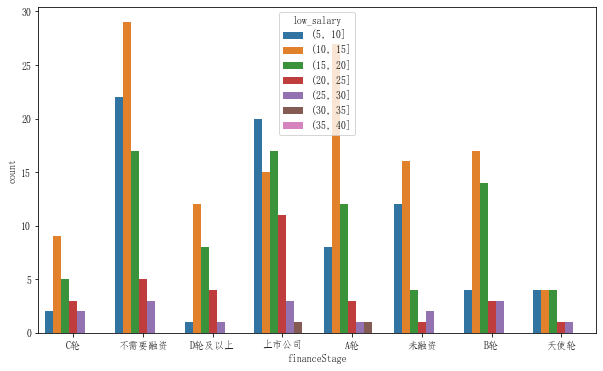

In [47]:
import seaborn as sns
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(10, 6))
sns.countplot(x="financeStage", hue="low_salary", data=df)